In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [267]:
df_lugar = pd.read_csv('lugar.csv', encoding = "latin")
estados = df_lugar.columns[2:35]
estados = np.array(estados)
estados[29] = 'Veracruz'
estados


array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz',
       'Yucatán', 'Zacatecas', 'Extranjero'], dtype=object)

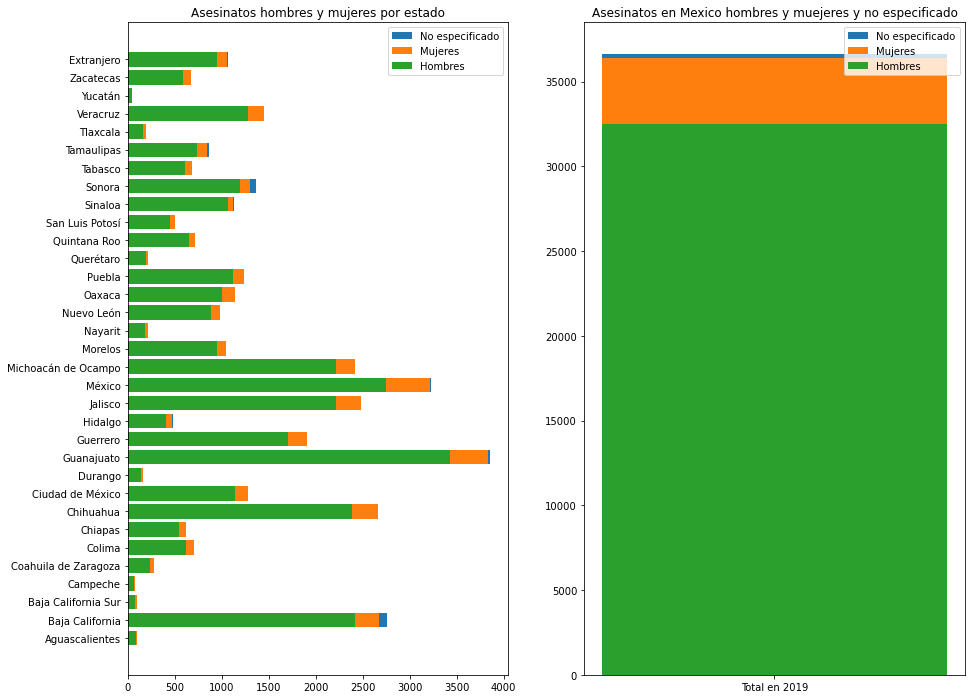

In [275]:
df_sexo = pd.read_csv('hombre_mujer.csv', encoding = "latin")
hombres = df_sexo['Hombre'][1:]
mujeres = df_sexo['Mujer'][1:]
no_esp = df_sexo['No especificado'][1:]

for i in range(len(hombres)):
    hombres[i+1] = hombres[i+1].replace(',','')
    
for i in range(len(mujeres)):
    mujeres[i+1] = mujeres[i+1].replace(',','')
    
#no_esp no requiere ded esta limpieza por que en los datos del inegi este dato viene como float 
#por que los otros vienen como string esta mas haya de mi comprendimiento
    
hombres = np.array(hombres)
mujeres = np.array(mujeres)
no_esp = np.array(no_esp)

hombres = hombres.astype(np.int)
mujeres = mujeres.astype(np.int)
no_esp = no_esp.astype(np.int)

#Lo que si es que necesitamos remplazar los espacios NAN del arreglo no_esp
#Para esto veremos que cuando pasamos estos 'nan' a entero el valor que nos regresa es un entero negativo
#Sabiendo esto podemos limpiar facilmente nuestros datos


for i in range(len(no_esp)):
    if no_esp[i] < 0:
        no_esp[i] = 0

fig, ax= plt.subplots(figsize=(15,12), ncols=2)

#primera grafica
ax[0].barh(estados,no_esp,label='No especificado', left=mujeres+hombres)
ax[0].barh(estados,mujeres,label='Mujeres', left=hombres)
ax[0].barh(estados,hombres,label='Hombres',)
ax[0].legend(loc='upper right')
ax[0].set_title('Asesinatos hombres y mujeres por estado')

#segunda grafica
#Tomamos los valores y los limpiamos

hombres = df_sexo['Hombre'][0]
hombres = hombres.replace(',','')
hombres = int(hombres)

mujeres = df_sexo['Mujer'][0]
mujeres = mujeres.replace(',','')
mujeres = int(mujeres)

no_esp = df_sexo['No especificado'][0]
no_esp = int(no_esp)

total = 'Total en 2019'

ax[1].bar(total,no_esp,label='No especificado', bottom=mujeres+hombres)
ax[1].bar(total,mujeres,label='Mujeres', bottom=hombres)
ax[1].bar(total,hombres,label='Hombres',)
ax[1].legend(loc='upper right')
ax[1].set_title('Asesinatos en Mexico hombres y muejeres y no especificado')

fig.savefig('Asesinatos2019.png', dpi=400)

